#                                    Analyse de la base de données des mails

##  Load Data

In [74]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import sklearn

In [75]:
#Defining variables
file_name = "./Documents/Priorisation de mails/n16_juin_juillet2022.xlsx"
start_month = 5
end_month = 7

In [76]:
xl_file = pd.ExcelFile(file_name, engine='openpyxl', )
df = xl_file.parse('Sheet1')
df = df[df['Date_Sent'].dt.month <= end_month] 
df = df[df['Date_Sent'].dt.month >= start_month] 

In [77]:
df.head(5)

,Unnamed: 0,Subject,Date_Sent,Body,From (address),To (address)
0,8,"RE: SpeedUp ,Z A350",2022-07-22 13:05:49,"Bonjour Allan, La réception des 2 cartons de t...",n16aeroparc@groupe-idea.com,n16aeroparc; ALLAN NORMAND
1,9,"TR Rave Linehaul vendredi S30, S31 et S32",2022-07-22 09:45:15,[Email émis par un expéditeur externe au group...,sylvain.hayez@dhl.com,serviceexpedition.nantes@airbus.com; P.HENNION...
2,10,Suppression OF cadre avant st eloi,2022-07-22 09:37:42,"Bonjour, Nous avons 7 OF PGI sur deux référenc...",fleport@groupe-idea.com,mohammed.ayyadi.external@airbus.com
3,11,TR: Livr 108771187 BOUY URGENT,2022-07-21 14:22:27,Cordialement MOYON Yvan CHARGE DE PRESTATION A...,n18aeroparc@groupe-idea.com,Le Port Florine
4,12,Retour ZLOG 111567062,2022-07-21 12:27:12,[Email émis par un expéditeur externe au group...,francois.mouezy@airbus.com,n16aeroparc


# Analyse Data

## 1 - Informations générales :

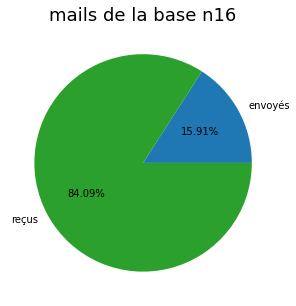

In [5]:
## distinguer les mails envoyés par IDEA des mails reçus

s = 'groupe-idea'
s = s.lower()

S = 0
for element in df['From (address)'] :
    a = str(element).lower()
    if s in a:
        S = S+1
        
somme = S
# print("nombez de mails envoyés par IDEA : ",S)
# print("nombre de mails envoyé par les autres expéditeurs : ", len(df)-S)

import matplotlib
import matplotlib.pyplot as plt

plt.figure(1, figsize=(10,5))
plt.title("mails de la base n16", fontsize = 18)
plt.pie([S,len(df)-S], labels=['envoyés','reçus'],autopct='%1.2f%%',textprops={'fontsize': 10},colors = ['tab:blue','tab:green'])
#plt.legend()
plt.show()

In [6]:
infos = np.array([len(df),S,len(df)-S])

## Répartition de mails par type (direct, réponse, forward, réponse automatique):

In [7]:
##Répartition de la base de donnée entière

u = 're:'
v = ['fw','fwd','tr:']
w = ['automatic reply','réponse automatique']


# direct = 0
# re = 0
# fw = 0
# auto_re = 0


# for i, row in df.iterrows():  
#     element = row['Subject']
#     if str(element).lower().startswith(u) : 
#         df.loc[i,'type'] = 'réponse'
#         re = re + 1
#     elif list(filter(str(element).lower().startswith, v)) != [] :
#         fw = fw+1
#         df.loc[i,'type'] = 'fwd'
#     elif list(filter(str(element).lower().startswith, w)) != [] :
#         auto_re = auto_re + 1
#         df.loc[i,'type'] = 'réponse automatique'
#     else :
#         direct = direct + 1
#         df.loc[i,'type'] = 'direct'


# plt.figure(1, figsize=(10,5))
# plt.bar(['direct','réponse','forward','réponse automatique'],[direct,re,fw,auto_re])
# plt.title("répartition des mails par type",fontsize = 18)
# y = [direct,re,fw,auto_re]
# for index,data in enumerate(y):
#     plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10))


# plt.show()

In [8]:
## Séparation de la base de donnée en mails reçus vs mails envoyés

#mails envoyés

env_df = df
env_df['From (address)'] = env_df['From (address)'].replace('-', np.nan)
env_df = env_df.dropna(axis=0, subset=['From (address)'])
env_df = env_df[env_df['From (address)'].str.lower().str.contains(s)] 

#mails reçus
rec_df = df 
rec_df['From (address)'] = rec_df['From (address)'].replace('-', np.nan)
rec_df = rec_df.merge(env_df, how="left", left_on=df.columns.values.tolist(), right_on=df.columns.values.tolist(), indicator=True)
rec_df = rec_df.query("_merge == 'left_only'")[df.columns.values.tolist()]

In [9]:
##Répartition de la base de donnée des mails reçus

# plt.figure(1, figsize=(10,5))

# rec_type = rec_df['type'].value_counts().to_list()
# plt.bar(rec_df['type'].value_counts().index.to_list(),rec_type)
# plt.title("répartition des mails reçus par type",fontsize = 18)

# y = rec_df['type'].value_counts().to_list()
# for index,data in enumerate(y):
#     plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10))

In [10]:
##Répartition de la base de donnée des mails envoyés

# plt.figure(1, figsize=(10,5))
# env_type = env_df['type'].value_counts().to_list()
# plt.bar(env_df['type'].value_counts().index.to_list(),env_type)
# plt.title("répartition des mails envoyés par type",fontsize = 18)
# y = env_df['type'].value_counts().to_list()
# for index,data in enumerate(y):
#     plt.text(x=index , y =data+data/100 , s=f"{data}" , fontdict=dict(fontsize=10))

In [11]:
# typ = pd.DataFrame({'type':['direct','réponse','forward','réponse automatique'],'envoyés':env_type,'reçus':rec_type})
# typ

## Répartition de mails par type - nouvelle version

In [12]:
import datetime

df_ = df[df['Date_Sent'].dt.month <= end_month] 
df_ = df[df['Date_Sent'] >= datetime.datetime(2021, start_month, 15)] 
df_= df_.reset_index(drop=True)
df_['Subject']=df['Subject'].astype('string')
df_.dropna(subset=['Subject'], inplace=True)

for idx,row in df_.iterrows():
    temp = row['Subject']
    temp = temp.lower()
    temp = temp.replace(' ','')
    temp = temp.replace('re:','')
    temp = temp.replace('fw:','')
    temp = temp.replace('fwd:','')
    temp = temp.replace('tr:','')
    temp = temp.replace('automaticreplyre:','')
    temp = temp.replace('automaticreply-outofofficere:','')
    temp = temp.replace('réponseautomatique:','')
    df_.at[idx, 'Subject'] = temp

groups = df_.groupby(['Subject'])

In [13]:
# df_.drop('type', axis=1, inplace=True)

# df_.head(2)

In [14]:
len(df_)

44

In [15]:
direct_envoyé = 0
direct_reçu = 0
rep_envoyé = 0
rep_reçu = 0
s = 'groupe-idea'
s = s.lower()

for group_key, group_value in groups:
    group = groups.get_group(group_key)
    group = group.reset_index(drop=True)
    
    for idx, row in group.iterrows() :
        if idx == 0 :
            a = str(row['From (address)']).lower()
            if s in a:
                direct_envoyé = direct_envoyé + 1
            else :
                direct_reçu = direct_reçu + 1
        else :
            a = str(row['From (address)']).lower()
            if s in a:
                rep_envoyé = rep_envoyé + 1
            else :
                rep_reçu = rep_reçu + 1


In [16]:
print(direct_envoyé)
print(direct_reçu)
print(rep_envoyé)
print(rep_reçu)

6
26
1
11


In [17]:
w = np.array([[direct_envoyé,rep_envoyé],[direct_reçu,rep_reçu]])

## 2 - Nombre de mails envoyés par les entreprises 


In [18]:
## Analyse des mails reçus par des expéditeurs autre que IDEA

others = [x for x in df['From (address)'] if not (s in x)]
## Entreprises expéditrices autre qu'IDEA

ent=[]
char1 = '@'
char2 = '.'
for element in others :
    ent.append(str(element)[str(element).find(char1)+1 : str(element).rfind(char2)])


while 'na' in ent :
    ent.remove('na')
    
ent_unique=list(set(ent))

counts = []
for element in ent_unique : 
#     print('nombre de mail envoyé par ',element,' : ',ent.count(element))
    counts.append(ent.count(element))
    
data = {'entreprise':ent_unique,'nombre de mails':counts}
nb_mails = pd.DataFrame(data)
nb_mails.sort_values(by=['nombre de mails'],ascending=False,ignore_index=True)

,entreprise,nombre de mails
0,airbus,26
1,dhl,9
2,heppner-group,1
3,mecachromegroup,1


In [19]:
## Regrouper les entreprises qui ont envoyé moins de 10 mails dans une catégorie "other"

x = 0
nb_mails1 = nb_mails

oth = []

print(len(nb_mails))
for i in range(len(nb_mails)):
    
    if nb_mails.iloc[i]['nombre de mails']<10:
        
        x = x + nb_mails.iloc[i]['nombre de mails']
        
        oth.append(nb_mails.iloc[i]['entreprise'])
        nb_mails1 = nb_mails1.drop([i])
        
nb_mails1 = nb_mails1.append({'entreprise': 'other',
                         'nombre de mails': x}, ignore_index=True)

nb_mails1 = nb_mails1.sort_values(by=['nombre de mails'],ascending=False,ignore_index=True)
nb_mails1
#nb_mails1.to_csv('.\\Documents\\données dashboard n16\\mails_enoyés_par_entreprise.csv')

# for i in range(len(nb_mails1['nombre de mails'])):
#     nb_mails1["nombre de mails"][i] = "{:,}".format(nb_mails1["nombre de mails"][i]).replace(',', ' ')

4


,entreprise,nombre de mails
0,airbus,26
1,other,11


<Figure size 720x360 with 0 Axes>

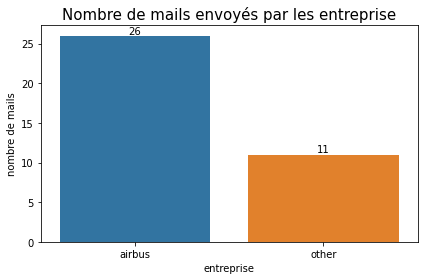

In [20]:
import matplotlib

import matplotlib.pyplot as plt

import seaborn as sns

plt.figure(figsize=(10,5))
# make barplot and sort bars

fig, ax = plt.subplots()
# sns.set(font_scale=10)
sns.barplot(x='entreprise',
            y="nombre de mails", 
            data=nb_mails1, 
            order=nb_mails1.sort_values('nombre de mails',ascending=False).entreprise)

ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title("Nombre de mails envoyés par les entreprise",fontsize = 15)
ax.bar_label(ax.containers[0])


    
plt.tight_layout()
plt.show()

## 2bis - Nombre de mails envoyés par personne :


In [21]:
## Les top  senders (personnes) du dernier mois

personnes=[]
char = '@'

for element in others :
    personnes.append(str(element)[ : str(element).find(char)])


# while 'na' in ent :
#     ent.remove('na')

personnes_unique=list(set(personnes))

ent_per = []

for personne in personnes:
    for element in others :
        if str(personne) in str(element):
            ent_per.append(str(element)[str(element).find(char1)+1 : str(element).rfind(char2)])
            break 

counts_per_month1 = []
df_temp = df[df['Date_Sent'].dt.month == start_month]
for element in personnes_unique:
    c = 0
    for idx, row in df_temp.iterrows():
        if str(element) in str(row['From (address)']):
            c = c + 1
    counts_per_month1.append(c)

counts_per_month2 = []
df_temp = df[df['Date_Sent'].dt.month == start_month + 1]
for element in personnes_unique:
    c = 0
    for idx, row in df_temp.iterrows():
        if str(element) in str(row['From (address)']):
            c = c + 1
    counts_per_month2.append(c)

counts_per_month3 = []
df_temp = df[df['Date_Sent'].dt.month == start_month + 2]
for element in personnes_unique:
    c = 0
    for idx, row in df_temp.iterrows():
        if str(element) in str(row['From (address)']):
            c = c + 1
    counts_per_month3.append(c)
    

prénoms = []
for i in range(len(personnes_unique)):
    
    element = personnes_unique[i]
    element = element.replace('.',' ')
            
    prénoms.append(element)
    
ent_per_unique = []

for element in personnes_unique :
    i = personnes.index(element)
    ent_per_unique.append(ent_per[i])
    
counts_personnes = []
for element in personnes_unique : 
    #print('nombre de mail envoyé par ',element,' : ',personnes.count(element))
    counts_personnes.append(personnes.count(element))
    
data = {'personne':prénoms,'entreprise':ent_per_unique,'nombre de mails':counts_per_month3}#, 'juin':counts_per_month1,'juillet':counts_per_month2,'oaût':counts_per_month3}
top_senders = pd.DataFrame(data)
top_senders = top_senders.sort_values(by='nombre de mails',ascending = False,ignore_index = True)

print('top 5 senders du dernier mois: ',top_senders['personne'].to_list()[0:5])

top5_senders = top_senders.iloc[:5,:]
top5_senders

top 5 senders du dernier mois:  ['sylvain hayez', 'jerome poirier', 'bridget baro2', 'Christine Renou', 'francois mouezy']


,personne,entreprise,nombre de mails
0,sylvain hayez,dhl,3
1,jerome poirier,airbus,3
2,bridget baro2,dhl,2
3,Christine Renou,dhl,1
4,francois mouezy,airbus,1


## 3 - Nombre de mails envoyés par Airbus internes vs externes :

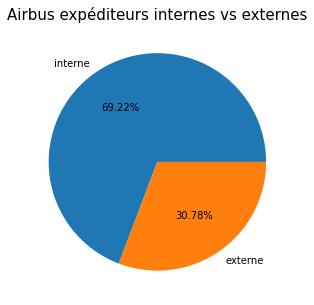

In [22]:
#Airbus : mails internes vs externes 

exter = 0
inter = 0
 
for element in others :
    if "@airbus." in str(element).lower() :
        if "external" in str(element).lower():
            exter = exter + 1
        else :
            inter = inter + 1
    
plt.figure(1, figsize=(10,5))
plt.title("Airbus expéditeurs internes vs externes",fontsize = 15)
plt.pie([848,377], labels=['interne','externe'],autopct='%1.2f%%',textprops={'fontsize': 10})
plt.show()

## 4 - Nombre de mails échangés par mois :

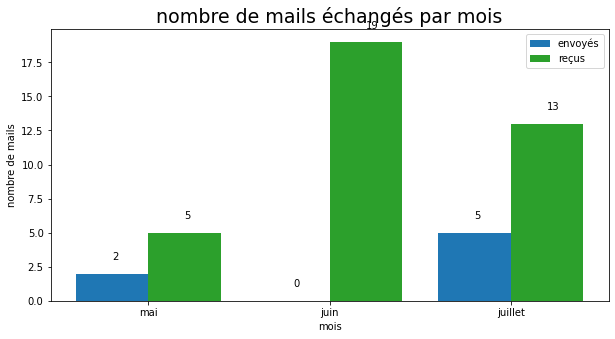

In [23]:
df1 = df[['Date_Sent', 'From (address)','To (address)']]
df2 = df1.groupby([df1['Date_Sent'].dt.year.rename('year'), df1['Date_Sent'].dt.month.rename('month')]).agg({'count'})
df3 = df1.groupby([df1['Date_Sent'].dt.year.rename('year'), df1['Date_Sent'].dt.month.rename('month')])
monthly_IDEA = []
monthly_others = []

for e in df3.groups.keys():
    temp = df3.get_group(e)
    S = 0
    for element in temp['From (address)'] :
        a = str(element).lower()
        if s in a:
            S = S+1
    monthly_IDEA.append(S)
    monthly_others.append(len(temp)-S)
#monthly_IDEA
monthsofyear = ['janvier','février','mars','avril','mai','juin','juillet','août','septembre','octobre','novembre','decembre']
months = [monthsofyear[start_month-1],monthsofyear[start_month],monthsofyear[end_month-1]]
X_axis = np.arange(len(months))
plt.figure(1, figsize=(10,5))  
plt.bar(X_axis - 0.2, monthly_IDEA, 0.4, label = 'envoyés')
plt.bar(X_axis + 0.2, monthly_others, 0.4, label = 'reçus',color = 'tab:green')
  
plt.xticks(X_axis, months)
plt.xlabel("mois")
plt.ylabel("nombre de mails")
plt.title("nombre de mails échangés par mois",fontsize = 19)
plt.legend()

for index,data in enumerate(monthly_IDEA):
    plt.text(x=index-0.2 , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10))
    
for index,data in enumerate(monthly_others):
    plt.text(x=index+0.2 , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10))

plt.show()

In [24]:
echanges_mensuels = pd.DataFrame({'mois':[monthsofyear[start_month-1],monthsofyear[start_month],monthsofyear[end_month-1]],'mails envoyés par Idea' : monthly_IDEA,'mails reçus par Idea' :monthly_others})


In [25]:
echanges_mensuels

,mois,mails envoyés par Idea,mails reçus par Idea
0,mai,2,5
1,juin,0,19
2,juillet,5,13


In [26]:
# echanges_mensuels.to_numpy()

## 5 - Nombre de mails envoyés par entreprise par mois :

In [27]:
e[1]

7

In [28]:
#Analyse par mois des mails envoyés par IDEA

months = [monthsofyear[start_month-1],monthsofyear[start_month],monthsofyear[end_month-1]]

monthly_envois = dict()
for element in months :
    monthly_envois[str(element)] = [0]*len(ent_unique)
    
#print(monthly_envois)
for e in df3.groups.keys():
    temp = df3.get_group(e)
    #temp.info()
    for f in temp['To (address)']:
        for element in ent_unique : 
            if element in str(f).lower():
                monthly_envois[monthsofyear[e[1]-1]][ent_unique.index(element)] = monthly_envois[monthsofyear[e[1]-1]][ent_unique.index(element)]+ 1
    #print(monthly_envois)
    
#print("  **mail envoyé par IDEA par entreprise par mois**")
new1 = pd.DataFrame.from_dict(monthly_envois)
new1.insert(0, "entreprise", ent_unique, True)

#monthly counts par entreprise 

keyList = ["entreprise"]
for e in months :
    keyList.append(str(e))

d = {key: [] for key in keyList}

for element in ent_unique :
    d['entreprise'].append(element)
    for e in df3.groups.keys():
        temp = df3.get_group(e)
        S = 0
        t = [x for x in temp['From (address)'] if not (str(x).lower()).startswith(s)]
        x = sum(element in str(s).lower() for s in t)
        d[monthsofyear[e[1]-1]].append(x)
        
new = pd.DataFrame.from_dict(d) 
new.sort_values(by=[monthsofyear[start_month-1]],ascending=True,ignore_index=True)

new3 = new.sum(axis=1).to_frame().join(new1.sum(axis=1).to_frame(), lsuffix='_reçus', rsuffix='_envoyés')
new3.insert(0, "entreprise", ent_unique, True)
new

,entreprise,mai,juin,juillet
0,heppner-group,0,1,0
1,mecachromegroup,0,0,1
2,dhl,0,3,6
3,airbus,5,15,6


## Nombre de destinataires par mail :

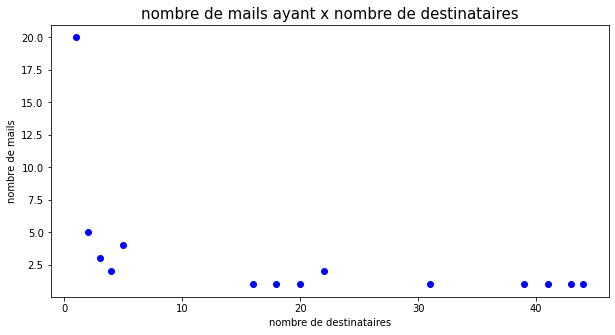

In [29]:
def replace_substring(string, substr, new):
    
    i = 0
    while i < len(string) - len(substr) + 1:
        # Check if substring starts at i
        #print(string[i:i+len(substr)])
        if string[i:i+len(substr)] == substr:
            v = string[:i]+new+string[i+len(substr):]
            string = v
            break   
        i += 1
    
    return string

df_new = df
nb_destinataires = []
c=[]
b=[]

for element in df_new['To (address)'] :
    
    z = str(element).lower()
    #z = replace_substring(z, s, '@IDEA')
    if len(z)==0:
        destinataires = 0
    else :
        destinataires = z.count(';') + 1
    
    
    
#     w = str(element).lower()
#     w = replace_substring(w, s, '@IDEA')
#     #print(w.count('@'))
    nb_destinataires.append(destinataires)
#nb_destinataires =list(set(nb_destinataires))
for x in list(set(nb_destinataires)):
    b.append(x)
    c.append(nb_destinataires.count(x))
    
plt.figure(1, figsize=(10,5)) 

#fig, ax = plt.subplots()
plt.scatter(b,c,color='b')
plt.xlabel('nombre de destinataires')
plt.ylabel('nombre de mails')
plt.title('nombre de mails ayant x nombre de destinataires',fontsize = 15)
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

## Nature des mails : question, alerte de risque, simple information

In [30]:
##Répartition de la base de données des mails reçus par nature (question, alerte de risque, simple information)

#question : point d'interrogation, vocabulaire (demande..)
#alerte de risque : point d'exclamation, vocabulaire (risque, urgent, litige)
#simple information : le reste

vocab_risque = ["risque","urgent","litige","ttu","urgence"]

nature = []

for idx, row in rec_df.iterrows():
    #question
    if len(set(['re','re:','réponse'])&set(str(row['Subject']).lower().split())) == 0:
        if  len(set(['?','demande','svp','pouvez-vous'])&(set(str(row['Body']).lower().split())|set(str(row['Subject']).lower().split()))) != 0:
            nature.append("question")
        elif len(set(vocab_risque)&(set(str(row['Body']).lower().split())|set(str(row['Subject']).lower().split()))) != 0:
            nature.append("alerte de risque")
        else :
            nature.append("simple information")
    
    else :
        nature.append("simple information")
        
rec_df = rec_df.assign(nature = nature)

# plt.figure(1, figsize=(10,5)) 

# #fig, ax = plt.subplots()
# plt.bar(['simple information','question','alerte de risque'], [nature.count('simple information'),nature.count('question'),nature.count('alerte de risque')])
# plt.title("répartition des mails par nature",fontsize = 18)
# ax.get_yaxis().set_major_formatter(
# matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
# plt.show()

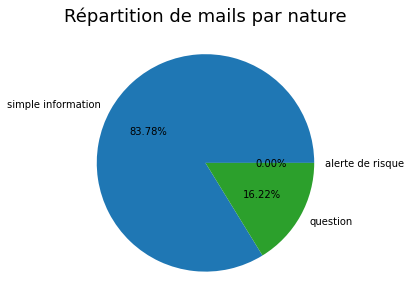

In [31]:
plt.figure(1, figsize=(10,5))
plt.title("Répartition de mails par nature",fontsize = 18)
plt.pie([nature.count('simple information'),nature.count('question'),nature.count('alerte de risque')], labels=['simple information','question','alerte de risque'],autopct='%1.2f%%',textprops={'fontsize': 10},colors = ['tab:blue','tab:green','tab:pink'])
plt.show()

In [32]:

dernier_mois = rec_df[rec_df['Date_Sent'].dt.month == end_month] ['nature'].value_counts().to_list()
mois_précédent = rec_df[rec_df['Date_Sent'].dt.month == end_month-1] ['nature'].value_counts().to_list()

changement = np.zeros(len(dernier_mois))
for i in range(len(dernier_mois)):
    changement[i]=np.int(np.around(((dernier_mois[i] - mois_précédent[i])/mois_précédent[i])*100))
    
nature = pd.DataFrame({'nature':rec_df['nature'].value_counts().index.to_list(),'dernier_mois':dernier_mois,'comparaison en %':changement})

nature

,nature,dernier_mois,comparaison en %
0,simple information,11,-27.0
1,question,2,-50.0


In [33]:
#Analyse par mois

df_nature = pd.DataFrame(columns = ['mois', 'simple information', 'question','alerte de risque'])

rec_df_groups = rec_df.groupby([rec_df['Date_Sent'].dt.month.rename('month')])

i = 6 
for group_key, group_value in rec_df_groups:
    group = rec_df_groups.get_group(group_key)
    
    nature = []
      
    for idx, row in group.iterrows():
    #question
        if len(set(['re','re:','réponse'])&set(str(row['Subject']).lower().split())) == 0:
            if  len(set(['?','demande','svp','pouvez-vous'])&(set(str(row['Body']).lower().split())|set(str(row['Subject']).lower().split()))) != 0:
                nature.append("question")
            elif len(set(vocab_risque)&(set(str(row['Body']).lower().split())|set(str(row['Subject']).lower().split()))) != 0:
                nature.append("alerte de risque")
            else :
                nature.append("simple information")

        else :
            nature.append("simple information")
    print([*[i],*[nature.count('simple information'),nature.count('question'),nature.count('alerte de risque')]])
    
    df_nature.loc[len(df_nature)] = [*[i],*[nature.count('simple information'),nature.count('question'),nature.count('alerte de risque')]]
    i = i + 1
        
df_nature

[6, 5, 0, 0]
[7, 15, 4, 0]
[8, 11, 2, 0]


,mois,simple information,question,alerte de risque
0,6,5,0,0
1,7,15,4,0
2,8,11,2,0


## Répartition des mails par temps de réponse :

- le temps d'échange d'un mail est la durée entre l'instant où le mail à été envoyé et l'instant où on a envoyé la dernière réponse pour ce mail

In [34]:

# df_direct = df[df['type'].isin(['direct','fwd']) ]
# df_rep = df[df['type']=='réponse']

# import datetime
# ech = []
# temps= []
# for idx, row in df_direct.iterrows():
#     sujet = str(row['Subject'])
#     start = datetime.datetime.strptime(str(row['Date Sent']),"%Y-%m-%d %H:%M:%S")
#     c = 0
#     ech_times = []
#     for i, r in df_rep.iterrows():
#         if sujet in str(r["Subject"]) :
#             ech_times.append(datetime.datetime.strptime(str(r['Date Sent']),"%Y-%m-%d %H:%M:%S"))            
#             c = c+1
#     if len(ech_times)>0 :
#         if max(ech_times)>start :
#             x = (max(ech_times) - start)
#             x = (x.days)*24 + (x.seconds)/3600
#             temps.append(x)
    
    
#     ech.append(c)
    
# # def addlabels(x,y):
# #     for i in range(len(x)):
# #         plt.text(i, y[i], y[i], ha = 'center')


# t4 = 0
# t24 = 0
# t72 = 0
# t_plus = 0

# for x in temps :
#     if x<4:
#         t4 = t4 + 1
#     elif x<24 :
#         t24 = t24 + 1
#     elif x<72 :
#         t72 = t72 + 1
#     else :
#         t_plus = t_plus + 1

# y = [t4,t24,t72,t_plus]
# perc = [str(t4/sum(y))+'%',str(t24/sum(y))+'%',str(t72/sum(y))+'%',str(t_plus/sum(y))+'%']

# x = ['moins de 4h' , 'mons de 24h', 'moins de 72h', 'plus de 72h']


# plt.figure(1, figsize=(10,5))
# fig, ax = plt.subplots()

# # width = 0.35
# # pps = ax.bar(x, y, width, align='center')


# # for p in pps:
# #    height = p.get_height()
# #    ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
# #       s="{}%".format(height),
# #       ha='center')
    
# ax.bar(x,y)

# for index,data in enumerate(y):
#     plt.text(x=index , y =data+1 , s=f"{round((data/sum(y)*100))}"+"%" , fontdict=dict(fontsize=10))

# plt.xlabel("temps de réponse")
# plt.ylabel("pourcentage de mails")
# plt.title("répartition des mails par temps de réponse",fontsize =18 )
# # plt.xticks(rotation=30)
# ax.get_yaxis().set_major_formatter(
# matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# plt.tight_layout()
# plt.show()

In [35]:
# répartition_par_temps = pd.DataFrame({'temps':['moins de 4h' , 'mons de 24h', 'moins de 72h', 'plus de 72h'],'nombre de mails':[t4,t24,t72,t_plus]})


## Répartition de mails par temps de réponse/ nb d'échanges - version modifiée 2

In [36]:
import datetime

df_ = df[df['Date_Sent'].dt.month <= end_month] 
df_ = df[df['Date_Sent'] >= datetime.datetime(2021, end_month-1, 15)] 
df_= df_.reset_index(drop=True)
df_['Subject']=df['Subject'].astype('string')
df_.dropna(subset=['Subject'], inplace=True)

for idx,row in df_.iterrows():
    temp = row['Subject']
    temp = temp.lower()
    temp = temp.replace(' ','')
    temp = temp.replace('re:','')
    temp = temp.replace('fw:','')
    temp = temp.replace('fwd:','')
    temp = temp.replace('tr:','')
    temp = temp.replace('automaticreplyre:','')
    temp = temp.replace('automaticreply-outofofficere:','')
    temp = temp.replace('réponseautomatique:','')
    df_.at[idx, 'Subject'] = temp

groups = df_.groupby(['Subject'])

In [37]:
s = 'groupe-idea'
s = s.lower()


t = []
exch = []


for group_key, group_value in groups:
    group = groups.get_group(group_key)
    group = group.reset_index(drop=True)
    display(group)
    
    for idx, row in group.iterrows() :
        d = 0
        a = str(row['From (address)']).lower()
        if s in a:
            if len(group)>=idx+2:
                temp = group[idx+1:]
                D = datetime.datetime.strptime(str(row['Date_Sent']),"%Y-%m-%d %H:%M:%S")
                for i, r in temp.iterrows():
                    b = str(r['From (address)']).lower()
                    if not b.startswith(s):
                        d = datetime.datetime.strptime(str(r['Date_Sent']),"%Y-%m-%d %H:%M:%S")
                        break
                if d != 0:
                    x = (D - d)
                    x = (x.days)*24 + (x.seconds)/3600
                    t.append(x)
                    exch.append(len(group[:idx]))
            
        
        

,Unnamed: 0,Subject,Date_Sent,Body,From (address),To (address)
0,51,accidentavecarrêtsuri05,2022-05-04 07:21:03,[Email émis par un expéditeur externe au group...,antoine.percevault@airbus.com,MARLENE BARDOT; David Xavier; Thomas Roxane; n...


,Unnamed: 0,Subject,Date_Sent,Body,From (address),To (address)
0,32,aquiadresservosdemandes?demandedetaxi27/06nt->...,2022-06-27 11:03:59,[Email émis par un expéditeur externe au group...,anne-sophie.an.rault@airbus.com,n16aeroparc


,Unnamed: 0,Subject,Date_Sent,Body,From (address),To (address)
0,17,art/snaclineplanningnte//juillet-aout2022//w28...,2022-07-11 15:20:46,[Email émis par un expéditeur externe au group...,bridget.baro2@dhl.com,"''NANTES, Service Expedition'; 'yohann.kergona..."
1,19,art/snaclineplanningnte//juillet-aout2022//w28...,2022-07-08 16:52:57,[Email émis par un expéditeur externe au group...,bridget.baro2@dhl.com,"''NANTES, Service Expedition'; 'yohann.kergona..."


,Unnamed: 0,Subject,Date_Sent,Body,From (address),To (address)
0,38,cadresava350nonréceptionnés,2022-06-20 18:06:07,[Email émis par un expéditeur externe au group...,allan.normand@airbus.com,BENOIT LOUBET


,Unnamed: 0,Subject,Date_Sent,Body,From (address),To (address)
0,33,caissespxlbb2,2022-06-27 09:11:43,[Email émis par un expéditeur externe au group...,morgan.m.lebeau@airbus.com,n16aeroparc; Hervouet Christophe; Sery Sabrina


,Unnamed: 0,Subject,Date_Sent,Body,From (address),To (address)
0,13,commanderéparationenattentedetraitement,2022-07-19 10:38:55,"Bonjour, La caisse n’est pas mise à dispositio...",fleport@groupe-idea.com,FREDERIC NOIREAUX; n16aeroparc
1,14,commanderéparationenattentedetraitement,2022-07-19 07:17:57,[Email émis par un expéditeur externe au group...,frederic.noireaux@airbus.com,n16aeroparc


,Unnamed: 0,Subject,Date_Sent,Body,From (address),To (address)
0,42,créer2trpour1aller-retour,2022-06-10 14:51:10,[Email émis par un expéditeur externe au group...,sylvain.hayez@dhl.com,à: BOUGUENAIS; Lemaitre Sebastien; Breteau Val...


,Unnamed: 0,Subject,Date_Sent,Body,From (address),To (address)
0,49,dmeretourcaissesfournisseur=>caissecartonaios,2022-05-05 07:52:31,[Email émis par un expéditeur externe au group...,jean-charles.le-queau@airbus.com,n16aeroparc; n16aeroparc


,Unnamed: 0,Subject,Date_Sent,Body,From (address),To (address)
0,43,"démarragedurôle""pointfocaltransport""",2022-06-03 12:44:06,[Email émis par un expéditeur externe au group...,anne-sophie.an.rault@airbus.com,"NANTES, Service Expedition; RECEPTION-CENTRALE..."
1,44,"démarragedurôle""pointfocaltransport""",2022-06-02 14:05:37,[Email émis par un expéditeur externe au group...,anne-sophie.an.rault@airbus.com,"NANTES, Service Expedition; RECEPTION-CENTRALE..."


,Unnamed: 0,Subject,Date_Sent,Body,From (address),To (address)
0,21,envoidescadres2het7hchezsainteloi,2022-07-08 11:33:06,[Email émis par un expéditeur externe au group...,jerome.poirier@airbus.com,Le Port Florine
1,22,envoidescadres2het7hchezsainteloi,2022-07-08 10:17:55,"Bonjour, C’est ok pour nous concernant le renv...",fleport@groupe-idea.com,"JEROME POIRIER; Landemaine, Laura; n16aeroparc..."
2,23,envoidescadres2het7hchezsainteloi,2022-07-08 08:32:46,[Email émis par un expéditeur externe au group...,jerome.poirier@airbus.com,"Landemaine, Laura; n16aeroparc; Le Port Florin..."


,Unnamed: 0,Subject,Date_Sent,Body,From (address),To (address)
0,24,expéditiondescadresducommunverssteloi,2022-07-07 15:12:28,[Email émis par un expéditeur externe au group...,jerome.poirier@airbus.com,n16aeroparc; Sery Sabrina; Le Port Florine; La...


,Unnamed: 0,Subject,Date_Sent,Body,From (address),To (address)
0,35,extractionstockeclisses,2022-06-23 09:14:17,[Email émis par un expéditeur externe au group...,isabelle.joyau@airbus.com,n16aeroparc
1,36,extractionstockeclisses,2022-06-23 08:27:01,[Email émis par un expéditeur externe au group...,isabelle.joyau@airbus.com,n16aeroparc
2,37,extractionstockeclisses,2022-06-23 08:04:04,[Email émis par un expéditeur externe au group...,isabelle.joyau@airbus.com,n16aeroparc


,Unnamed: 0,Subject,Date_Sent,Body,From (address),To (address)
0,25,feriejuillet2022,2022-07-06 13:16:27,[Email émis par un expéditeur externe au group...,Christine.Renou@dhl.com,Christine Renou (DHL FR)


,Unnamed: 0,Subject,Date_Sent,Body,From (address),To (address)
0,46,inventaire2021noneffectués-situationau16/05/20...,2022-05-17 13:11:21,"Bonjour, Pouvez-vous réaliser les inventaires ...",RThomas@groupe-idea.com,n16aeroparc


,Unnamed: 0,Subject,Date_Sent,Body,From (address),To (address)
0,39,inventairepackaginggca,2022-06-16 11:37:52,[Email émis par un expéditeur externe au group...,alban.du-tertre.external@airbus.com,ANTOINE PERCEVAULT


,Unnamed: 0,Subject,Date_Sent,Body,From (address),To (address)
0,26,lancementkiteclisses,2022-06-30 08:05:47,[Email émis par un expéditeur externe au group...,isabelle.joyau@airbus.com,"n16aeroparc; LOISEAU, CHRISTOPHE"


,Unnamed: 0,Subject,Date_Sent,Body,From (address),To (address)
0,11,livr108771187bouyurgent,2022-07-21 14:22:27,Cordialement MOYON Yvan CHARGE DE PRESTATION A...,n18aeroparc@groupe-idea.com,Le Port Florine


,Unnamed: 0,Subject,Date_Sent,Body,From (address),To (address)
0,50,livraisontd208874451,2022-05-04 07:38:51,"Florine, Sabrina, Merci de bien vouloir voir l...",n18aeroparc@groupe-idea.com,n16aeroparc; Hervouet Christophe; Le Port Flor...


,Unnamed: 0,Subject,Date_Sent,Body,From (address),To (address)
0,41,llpct-troutofhours/aog-newphonenumber,2022-06-14 08:22:05,[Email émis par un expéditeur externe au group...,anne-sophie.an.rault@airbus.com,'Expédition HUB; PELE Fabrice; HUCHET Nicolas;...


,Unnamed: 0,Subject,Date_Sent,Body,From (address),To (address)
0,45,"lsp000158670:process""transformation""refpremod>...",2022-05-17 15:47:20,[Email émis par un expéditeur externe au group...,matthieu.orain@airbus.com,ANTOINE PERCEVAULT
1,47,"lsp000158670:process""transformation""refpremod>...",2022-05-17 07:29:37,[Email émis par un expéditeur externe au group...,antoine.percevault@airbus.com,JOSE DACQUAY; SEBASTIEN GODARD; MATTHIEU ORAIN


,Unnamed: 0,Subject,Date_Sent,Body,From (address),To (address)
0,40,nouveloutilpourcréerunetr!,2022-06-15 10:12:25,[Email émis par un expéditeur externe au group...,anne-sophie.an.rault@airbus.com,"NANTES, Service Expedition; Barre Thomas; Perr..."


,Unnamed: 0,Subject,Date_Sent,Body,From (address),To (address)
0,18,planningfichesété2022,2022-07-11 15:08:50,[Email émis par un expéditeur externe au group...,sylvain.hayez@dhl.com,serviceexpedition.nantes@airbus.com; P.HENNION...


,Unnamed: 0,Subject,Date_Sent,Body,From (address),To (address)
0,15,planningfichesété2022v2,2022-07-13 06:27:36,[Email émis par un expéditeur externe au group...,anne-sophie.an.rault@airbus.com,"DOUAUD, Alexis (KASADENN)"
1,16,planningfichesété2022v2,2022-07-12 17:22:14,[Email émis par un expéditeur externe au group...,sylvain.hayez@dhl.com,serviceexpedition.nantes@airbus.com; P.HENNION...


,Unnamed: 0,Subject,Date_Sent,Body,From (address),To (address)
0,20,retourcaissespoutressaaeroparc,2022-07-08 15:37:52,[Email émis par un expéditeur externe au group...,Rodolphe.vigoureux@mecachromegroup.com,n16aeroparc; n18aeroparc; Thomas Roxane


,Unnamed: 0,Subject,Date_Sent,Body,From (address),To (address)
0,12,retourzlog111567062,2022-07-21 12:27:12,[Email émis par un expéditeur externe au group...,francois.mouezy@airbus.com,n16aeroparc


,Unnamed: 0,Subject,Date_Sent,Body,From (address),To (address)
0,48,réaffectationtronçon21pour2tr.a320:msn11117/11160,2022-05-09 07:05:08,[Email émis par un expéditeur externe au group...,isabelle.joyau@airbus.com,n16aeroparc


,Unnamed: 0,Subject,Date_Sent,Body,From (address),To (address)
0,28,souffrance/claim:as18074271ref:traii-11851632,2022-06-27 16:08:31,[Email émis par un expéditeur externe au group...,sylvain.hayez@dhl.com,ANTOINE PERCEVAULT
1,29,souffrance/claim:as18074271ref:traii-11851632,2022-06-27 15:04:59,[Email émis par un expéditeur externe au group...,antoine.percevault@airbus.com,Sylvain HAYEZ (DHL Supply Chain)
2,30,souffrance/claim:as18074271ref:traii-11851632,2022-06-27 14:38:36,[Email émis par un expéditeur externe au group...,sylvain.hayez@dhl.com,airbus.tower; n16aeroparc
3,31,souffrance/claim:as18074271ref:traii-11851632,2022-06-27 14:17:47,[Email émis par un expéditeur externe au group...,alexia.delpoux@heppner-group.com,n16aeroparc


,Unnamed: 0,Subject,Date_Sent,Body,From (address),To (address)
0,8,"speedup,za350",2022-07-22 13:05:49,"Bonjour Allan, La réception des 2 cartons de t...",n16aeroparc@groupe-idea.com,n16aeroparc; ALLAN NORMAND


,Unnamed: 0,Subject,Date_Sent,Body,From (address),To (address)
0,10,suppressionofcadreavantsteloi,2022-07-22 09:37:42,"Bonjour, Nous avons 7 OF PGI sur deux référenc...",fleport@groupe-idea.com,mohammed.ayyadi.external@airbus.com


,Unnamed: 0,Subject,Date_Sent,Body,From (address),To (address)
0,27,testaccèstapps,2022-06-29 10:03:21,[Email émis par un expéditeur externe au group...,anne-sophie.an.rault@airbus.com,Le Port Florine


,Unnamed: 0,Subject,Date_Sent,Body,From (address),To (address)
0,34,transfertusmaiosa350aeroparc,2022-06-27 08:52:30,[Email émis par un expéditeur externe au group...,francois.mouezy@airbus.com,ANNE SOPHIE RAULT; CARINE LETOURNEUR; Barre Th...


,Unnamed: 0,Subject,Date_Sent,Body,From (address),To (address)
0,9,"trravelinehaulvendredis30,s31ets32",2022-07-22 09:45:15,[Email émis par un expéditeur externe au group...,sylvain.hayez@dhl.com,serviceexpedition.nantes@airbus.com; P.HENNION...


In [38]:
print(len(t))
print(len(exch))

2
2


In [69]:
exch

[0, 1]

In [39]:
t

[3.3494444444444444, 1.7525]

<Figure size 720x360 with 0 Axes>

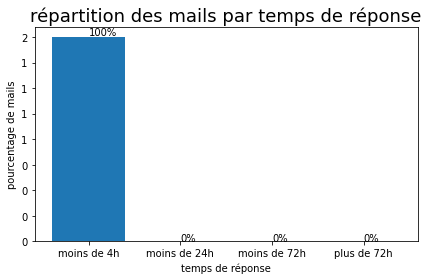

In [40]:
t4 = 0
avg4 = 0
t24 = 0
avg24 = 0
t72 = 0
avg72 = 0
t_plus = 0
avg_plus = 0

for i,x in enumerate(t) :
    if x<4:
        t4 = t4 + 1
        avg4 = avg4 + exch[i]
    elif x<24 :
        t24 = t24 + 1
        avg24 = avg24 + exch[i]
    elif x<72 :
        t72 = t72 + 1
        avg72 = avg72 + exch[i]
    else :
        t_plus = t_plus + 1
        avg_plus = avg_plus + exch[i]


if t4 ==0 :
    avg4 = 0
else :
    avg4 = np.round(avg4/t4,2)
    
if t24 ==0 :
    avg24 = 0
else :
    avg24 = np.round(avg24/t24,2)
    
if t72 ==0 :
    avg72 = 0
else :
    avg72 = np.round(avg72/t72,2)
    
if t_plus ==0 :
    avg_plus = 0
else :
    avg_plus = np.round(avg_plus/t_plus,2)
    


y = [t4,t24,t72,t_plus]
perc = [str(t4/sum(y))+'%',str(t24/sum(y))+'%',str(t72/sum(y))+'%',str(t_plus/sum(y))+'%']

x = ['moins de 4h' , 'moins de 24h', 'moins de 72h', 'plus de 72h']


plt.figure(1, figsize=(10,5))
fig, ax = plt.subplots()

# width = 0.35
# pps = ax.bar(x, y, width, align='center')


# for p in pps:
#    height = p.get_height()
#    ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
#       s="{}%".format(height),
#       ha='center')
    
ax.bar(x,y)

for index,data in enumerate(y):
    plt.text(x=index , y =data+data/100 , s=f"{round((data/sum(y)*100))}"+"%" , fontdict=dict(fontsize=10))

plt.xlabel("temps de réponse")
plt.ylabel("pourcentage de mails")
plt.title("répartition des mails par temps de réponse",fontsize =18 )
# plt.xticks(rotation=30)
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()

In [41]:
print(t4,np.round(avg4,2))
y = np.transpose(np.array([[t4,t24,t72,t_plus],[avg4,avg24,avg72,avg_plus]]))
#y = np.expand_dims(y, axis = 1)
y

2 0.5


array([[2. , 0.5],
       [0. , 0. ],
       [0. , 0. ],
       [0. , 0. ]])

## Répartion de mails par nombre d'échanges

- exemple de nombre d'échange si on envoir un mail après on reçoit une réponse puis on envoir une réponse, on compte 2 échanges pour ce mail

In [42]:
# counts_ech = []
# for element in list(set(ech)) : 
#     #print('nombre de mail envoyé par ',element,' : ',personnes.count(element))
#     counts_ech.append(ech.count(element))

# plt.figure(1, figsize=(7,5))

# # fig, ax = plt.subplots()
# plt.scatter(list(set(ech)),counts_ech,color='b')
# plt.xlabel("nombre d'échanges")
# plt.ylabel('nombre de mails')
# plt.title("nombre de mails ayant x nombre d'échanges",fontsize = 15)
# ax.get_yaxis().set_major_formatter(
# matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
# plt.show()

## Analyse par jour

In [43]:
import datetime

df['day_of_week'] = df['Date_Sent'].dt.day_name()
df['time'] = df['Date_Sent'].dt.time

# import locale

# locale.setlocale(locale.LC_ALL,"fr_FR")
# for i in df.index :
#       df['day_of_week'][i] = datetime.datetime.strftime(df['day_of_week'][i],"%a")
        
        
for idx, row in df.iterrows():
    if row['time']<datetime.time(12,0,0) :
        df.loc[idx,'time'] = 'am'
    else:
        df.loc[idx,'time'] = 'pm'

groups = df.groupby(['day_of_week', 'time'])

liste = []
for group_key, group_value in groups:
    liste.append(group_key)
    
analyse_par_jour = pd.DataFrame(liste, columns =['day', 'hour'])

avgs = []
b = 0
for group_key, group_value in groups:
    group = groups.get_group(group_key)
    dates = []
    for idx, row in group.iterrows():
        dates.append(row['Date_Sent'].date())
    dates = list(set(dates))
    if b<len(dates):
        b = len(dates)
    #print(group)
    avgs.append(len(group))
avgs = np.divide(avgs,b)

analyse_par_jour = analyse_par_jour.assign(moyenne_mesuelle_mails=np.round(avgs))

cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
analyse_par_jour['day'] = pd.Categorical(analyse_par_jour['day'], categories=cats, ordered=True)
analyse_par_jour = analyse_par_jour.sort_values('day')

analyse_par_jour

,day,hour,moyenne_mesuelle_mails
2,Monday,am,1.0
3,Monday,pm,2.0
6,Tuesday,am,1.0
7,Tuesday,pm,1.0
8,Wednesday,am,1.0
9,Wednesday,pm,0.0
4,Thursday,am,2.0
5,Thursday,pm,1.0
0,Friday,am,1.0
1,Friday,pm,1.0


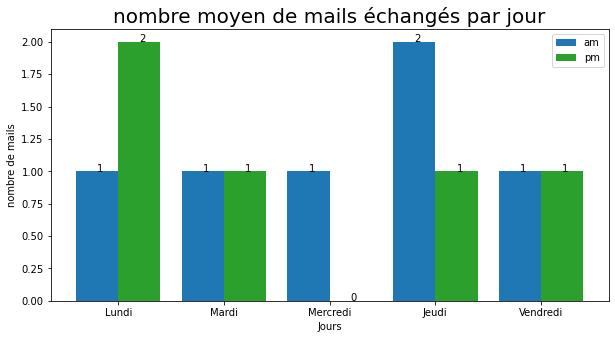

In [44]:
groups = analyse_par_jour.groupby(['hour'])

plt.figure(1, figsize=(10,5))

Days = ['Lundi','Mardi','Mercredi','Jeudi','Vendredi']
X_axis = np.arange(len(Days))
  
plt.bar(X_axis - 0.2, groups.get_group('am')['moyenne_mesuelle_mails'].to_list(), 0.4, label = 'am')
plt.bar(X_axis + 0.2, groups.get_group('pm')['moyenne_mesuelle_mails'], 0.4, label = 'pm',color='tab:green')
  
plt.xticks(X_axis, Days)
plt.xlabel("Jours")
plt.ylabel("nombre de mails")
plt.title("nombre moyen de mails échangés par jour",fontsize = 20)
plt.legend()

for index,data in enumerate(groups.get_group('am')['moyenne_mesuelle_mails'].to_list()):
    plt.text(x=index-0.2 , y =data , s=f"{round(data)}" , fontdict=dict(fontsize=10))
    
for index,data in enumerate(groups.get_group('pm')['moyenne_mesuelle_mails']):
    plt.text(x=index+0.2 , y =data , s=f"{round(data)}" , fontdict=dict(fontsize=10))

plt.show()

In [45]:
reçus_par_jour = pd.DataFrame({'jours':Days,'am' :groups.get_group('am')['moyenne_mesuelle_mails'].to_list() ,'pm' :groups.get_group('pm')['moyenne_mesuelle_mails'].to_list()})



## Analyse par temps de réponse/ nb d'échanges modifiée

In [46]:
# type(df['Date Sent'][152])

In [47]:
# df_ = df[df['Date Sent'].dt.month <= end_month] 
# df_ = df[df['Date Sent'] >= datetime.datetime(2021, 7, 15)] 
# df_= df_.reset_index(drop=True)
# df_['Subject']=df['Subject'].astype('string')
# df_.dropna(subset=['Subject'], inplace=True)

In [48]:
# for idx,row in df_.iterrows():
#     temp = row['Subject']
#     temp = temp.lower()
#     temp = temp.replace(' ','')
#     temp = temp.replace('re:','')
#     temp = temp.replace('fw:','')
#     temp = temp.replace('fwd:','')
#     temp = temp.replace('tr:','')
#     temp = temp.replace('automaticreplyre:','')
#     temp = temp.replace('automaticreply-outofofficere:','')
#     temp = temp.replace('réponseautomatique:','')
#     df_.at[idx, 'Subject'] = temp

In [49]:
# groups = df_.groupby(['Subject'])

In [50]:
# print(len(df_))
# print(len(groups))

In [51]:
# temps = []
# nb_echanges = []
# for group_key, group_value in groups:
#     group = groups.get_group(group_key)
#     #print(len(group))
#     ech_times = []
#     for i, r in group.iterrows():
#         ech_times.append(datetime.datetime.strptime(str(r['Date Sent']),"%Y-%m-%d %H:%M:%S")) 
#         #print(ech_times)
#     nb_echanges.append(len(group)-1)
#     if len(ech_times)>1 :
#         x = (max(ech_times) - min(ech_times))
#         x = (x.days)*24 + (x.seconds)/3600
#         temps.append(x)

In [52]:
# t4 = 0
# t24 = 0
# t72 = 0
# t_plus = 0

# for x in temps :
#     if x<4:
#         t4 = t4 + 1
#     elif x<24 :
#         t24 = t24 + 1
#     elif x<72 :
#         t72 = t72 + 1
#     else :
#         t_plus = t_plus + 1

# y = [t4,t24,t72,t_plus]
# perc = [str(t4/sum(y))+'%',str(t24/sum(y))+'%',str(t72/sum(y))+'%',str(t_plus/sum(y))+'%']

# x = ['moins de 4h' , 'mons de 24h', 'moins de 72h', 'plus de 72h']


# plt.figure(1, figsize=(10,5))
# fig, ax = plt.subplots()

# # width = 0.35
# # pps = ax.bar(x, y, width, align='center')


# # for p in pps:
# #    height = p.get_height()
# #    ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
# #       s="{}%".format(height),
# #       ha='center')
    
# ax.bar(x,y)

# for index,data in enumerate(y):
#     plt.text(x=index , y =data+1 , s=f"{round((data/sum(y)*100))}"+"%" , fontdict=dict(fontsize=10))

# plt.xlabel("temps de réponse")
# plt.ylabel("pourcentage de mails")
# plt.title("répartition des mails par temps de réponse",fontsize =18 )
# # plt.xticks(rotation=30)
# ax.get_yaxis().set_major_formatter(
# matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# plt.tight_layout()
# plt.show()

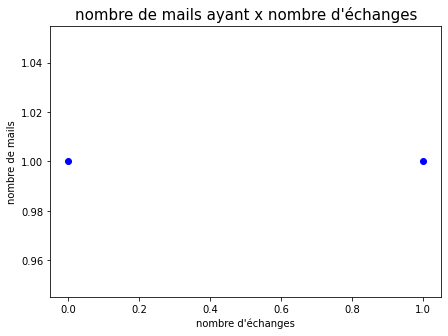

In [70]:
counts_ech = []
for element in list(set(exch)) : 
    #print('nombre de mail envoyé par ',element,' : ',personnes.count(element))
    counts_ech.append(exch.count(element))

plt.figure(1, figsize=(7,5))

# fig, ax = plt.subplots()
plt.scatter(list(set(exch)),counts_ech,color='b')
plt.xlabel("nombre d'échanges")
plt.ylabel('nombre de mails')
plt.title("nombre de mails ayant x nombre d'échanges",fontsize = 15)
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

## Vue Détaillée par jour 

- Dans cette partie on regarde le nombre de mails reçus par jour sur les chaque semaine des deux derniers mois

In [57]:
df_month1 = df[df['Date_Sent'].dt.month == end_month - 1] 
df_month2 = df[df['Date_Sent'].dt.month == end_month] 

In [58]:

df_month1['week']=df_month1['Date_Sent'].dt.isocalendar().week

weeks_month1 = df_month1.groupby(['week'])

# for group_key, group_value in semaines_month1:
#     group = weeks_month1.get_group(group_key)
    
df_month2['week']=df_month2['Date_Sent'].dt.isocalendar().week
    
weeks_month2 = df_month1.groupby(['week'])
#     display(group)
    
# dates = []

# for idx, row in df_month1.iterrows():
#     if row['day_of_week'] == 'Friday':
#         date = row['Date_Sent'].date()
#         if date not in dates :
#             dates.append(date)
            
# print(dates)

# semaine11 = df_month1[df_month1['Date_Sent'].dt.date <= dates[4]]
# df_month1 = df_month1[df_month1['Date_Sent'].dt.date > dates[4]]
# semaine12 = df_month1[df_month1['Date_Sent'].dt.date <= dates[3]]
# df_month1 = df_month1[df_month1['Date_Sent'].dt.date > dates[3]]
# semaine13 = df_month1[df_month1['Date_Sent'].dt.date <= dates[2]]
# df_month1 = df_month1[df_month1['Date_Sent'].dt.date > dates[2]]
# semaine14 = df_month1[df_month1['Date_Sent'].dt.date <= dates[1]]
# df_month1 = df_month1[df_month1['Date_Sent'].dt.date>dates[1]]
# semaine15 = df_month1[df_month1['Date_Sent'].dt.date <= dates[0]]
# df_month1 = df_month1[df_month1['Date_Sent'].dt.date>dates[0]]
        
# print(len(semaine11))
# print(len(df_month1))

In [ ]:
# df_month1

         day hour  mails
2     Monday   am      0
3     Monday   pm      0
4    Tuesday   am      0
5    Tuesday   pm      0
6  Wednesday   am      0
7  Wednesday   pm      0
9   Thursday   am      0
1   Thursday   pm      1
8     Friday   am      0
0     Friday   pm      1
         day hour  mails
1     Monday   am      0
2     Monday   pm      0
3    Tuesday   am      0
4    Tuesday   pm      0
5  Wednesday   am      0
6  Wednesday   pm      0
7   Thursday   am      0
8   Thursday   pm      0
9     Friday   am      0
0     Friday   pm      1
         day hour  mails
3     Monday   am      0
4     Monday   pm      0
1    Tuesday   am      1
8    Tuesday   pm      0
2  Wednesday   am      1
9  Wednesday   pm      0
0   Thursday   am      1
7   Thursday   pm      0
5     Friday   am      0
6     Friday   pm      0
         day hour  mails
8     Monday   am      0
0     Monday   pm      1
2    Tuesday   am      0
3    Tuesday   pm      0
4  Wednesday   am      0
5  Wednesday   pm      0


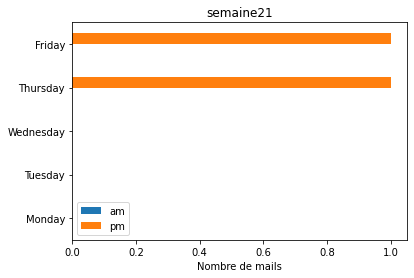

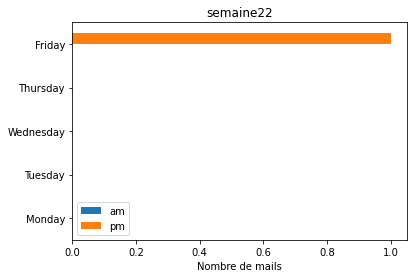

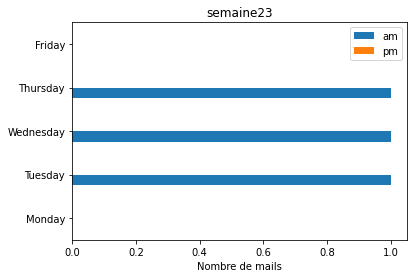

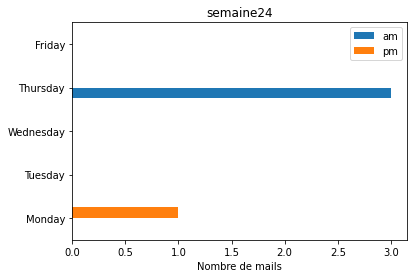

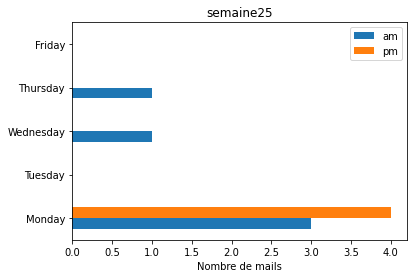

In [59]:
# dates = []

# for idx, row in df_month2.iterrows():
#     if row['day_of_week'] == 'Friday':
#         date = row['Date Sent'].date()
#         if date not in dates :
#             dates.append(date)
# print(dates)
# # semaine21 = df_month2[df_month2['Date Sent'].dt.date <= dates[4]]
# # df_month2 = df_month2[df_month2['Date Sent'].dt.date > dates[4]]
# semaine21 = df_month2[df_month2['Date Sent'].dt.date <= dates[3]]
# df_month2 = df_month2[df_month2['Date Sent'].dt.date > dates[3]]
# semaine22 = df_month2[df_month2['Date Sent'].dt.date <= dates[2]]
# df_month2 = df_month2[df_month2['Date Sent'].dt.date > dates[2]]
# semaine23 = df_month2[df_month2['Date Sent'].dt.date <= dates[1]]
# df_month2 = df_month2[df_month2['Date Sent'].dt.date>dates[1]]
# semaine24 = df_month2[df_month2['Date Sent'].dt.date <= dates[0]]
# df_month2 = df_month2[df_month2['Date Sent'].dt.date>dates[0]]
# semaine25 = df_month2
        
# print(len(semaine21))
# print(len(df_month2))

semaines_month2 = [] 

for group_key, group_value in weeks_month2:
    group = weeks_month2.get_group(group_key)
    semaines_month2.append(group)

semaines_month1 = [] 

for group_key, group_value in weeks_month1:
    group = weeks_month1.get_group(group_key)
    semaines_month1.append(group)
    
    
m2 = []

for i in range(len(semaines_month2)):
    semaine = semaines_month2[i]
    groups = semaine.groupby(['day_of_week', 'time'])
    liste = []
    for group_key, group_value in groups:
        liste.append(group_key)
    
    analyse_par_jour = pd.DataFrame(liste, columns =['day', 'hour'])
    
    li = []
    for group_key, group_value in groups:
        group = groups.get_group(group_key)
        li.append(len(group))
    analyse_par_jour = analyse_par_jour.assign(mails=li)
    
    #processing
    cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
    
    for element in cats :
        if element not in analyse_par_jour['day'].to_list() :
            analyse_par_jour.loc[len(analyse_par_jour)] = [element,'am',0]
            analyse_par_jour.loc[len(analyse_par_jour)] = [element,'pm',0]
            
            
    for element in analyse_par_jour['day'].to_list():
        if len(analyse_par_jour[analyse_par_jour['day']==str(element)]) == 1 :
            if analyse_par_jour[analyse_par_jour['day']==str(element)]['hour'].to_list() == ['am'] :
                analyse_par_jour.loc[len(analyse_par_jour)] = [str(element),'pm',0]
            if analyse_par_jour[analyse_par_jour['day']==str(element)]['hour'].to_list() == ['pm'] :
                analyse_par_jour.loc[len(analyse_par_jour)] = [str(element),'am',0]  
                
    periods = ['am','pm']
    analyse_par_jour['hour'] = pd.Categorical(analyse_par_jour['hour'], categories=periods, ordered=True)
    analyse_par_jour = analyse_par_jour.sort_values('hour')
    
    
    analyse_par_jour['day'] = pd.Categorical(analyse_par_jour['day'], categories=cats, ordered=True)
    analyse_par_jour = analyse_par_jour.sort_values('day')
    
    print(analyse_par_jour)
    
    groups = analyse_par_jour.groupby(['hour'])

    ax1 = fig.add_subplot(2,5,i+1)
    Days = ['Lundi','Mardi','Mercredi','Jeudi','Vendredi']
    data = {'am':groups.get_group('am')['mails'].to_list(),'pm':groups.get_group('pm')['mails'].to_list()}
    df = pd.DataFrame(data,columns=['am','pm'], index = [Days[i] for i,l in enumerate(cats) if l in groups.get_group('pm')['day'].to_list()])
    df = pd.DataFrame(data,columns=['am','pm'], index = groups.get_group('am')['day'].to_list())
    m2.append(df)
    df.plot.barh()

    plt.title('semaine2'+str(i+1))
    plt.xlabel('Nombre de mails')


In [ ]:
# semaines_month1 = [semaine11,semaine12,semaine13,semaine14,semaine15] 

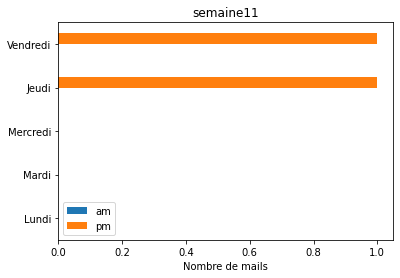

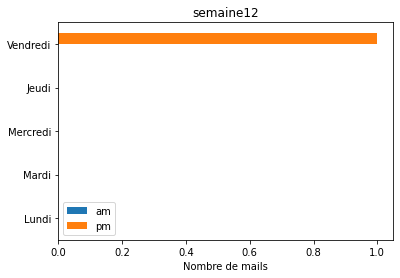

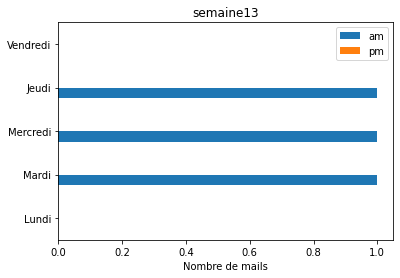

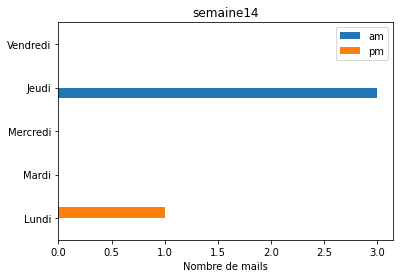

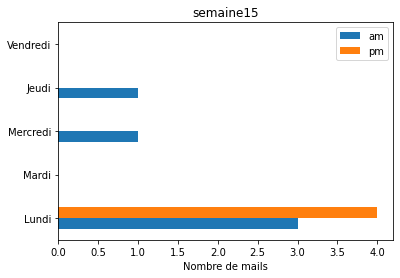

In [60]:
#fig, axs = plt.subplots(2,5)
# f, (ax1, ax2,  plt.subplots(1, 2, sharey=True)
#lt.figure(1, figsize=(15,10))
  
m1 = []

for i in range(len(semaines_month1)):
    semaine = semaines_month1[i]
    groups = semaine.groupby(['day_of_week', 'time'])
    liste = []
    for group_key, group_value in groups:
        liste.append(group_key)
    
    analyse_par_jour = pd.DataFrame(liste, columns =['day', 'hour'])
    
    li = []
    for group_key, group_value in groups:
        group = groups.get_group(group_key)
        li.append(len(group))
    analyse_par_jour = analyse_par_jour.assign(mails=li)
    
    #processing
    
    cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
    
    for element in cats :
        if element not in analyse_par_jour['day'].to_list() :
            analyse_par_jour.loc[len(analyse_par_jour)] = [element,'am',0]
            analyse_par_jour.loc[len(analyse_par_jour)] = [element,'pm',0]
            
    for element in analyse_par_jour['day'].to_list():
        if len(analyse_par_jour[analyse_par_jour['day']==str(element)]) == 1 :
            if analyse_par_jour[analyse_par_jour['day']==str(element)]['hour'].to_list() == ['am'] :
                analyse_par_jour.loc[len(analyse_par_jour)] = [str(element),'pm',0]
            if analyse_par_jour[analyse_par_jour['day']==str(element)]['hour'].to_list() == ['pm'] :
                analyse_par_jour.loc[len(analyse_par_jour)] = [str(element),'am',0]  
                
    periods = ['am','pm']
    analyse_par_jour['hour'] = pd.Categorical(analyse_par_jour['hour'], categories=periods, ordered=True)
    analyse_par_jour = analyse_par_jour.sort_values('hour')
    
    cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
    analyse_par_jour['day'] = pd.Categorical(analyse_par_jour['day'], categories=cats, ordered=True)
    analyse_par_jour = analyse_par_jour.sort_values('day')
    
#     print(analyse_par_jour)
    
    groups = analyse_par_jour.groupby(['hour'])

    ax1 = fig.add_subplot(2,5,i+1)

    Days = ['Lundi','Mardi','Mercredi','Jeudi','Vendredi']
    
    data = {'am':groups.get_group('am')['mails'].to_list(),'pm':groups.get_group('pm')['mails'].to_list()}
    df = pd.DataFrame(data,columns=['am','pm'], index = [Days[i] for i,l in enumerate(cats) if l in groups.get_group('pm')['day'].to_list()])
#     df = pd.DataFrame(data,columns=['am','pm'], index = groups.get_group('am')['day'].to_list())
    m1.append(df)
    df.plot.barh()

    plt.title('semaine1'+str(i+1))
    plt.xlabel('Nombre de mails')

    

## Save Data to excel

In [66]:
import openpyxl
from openpyxl import load_workbook


In [ ]:

dernier_mois = rec_df[rec_df['Date_Sent'].dt.month == end_month] ['nature'].value_counts().to_list()
mois_précédent = rec_df[rec_df['Date_Sent'].dt.month == end_month-1] ['nature'].value_counts().to_list()

changement = np.zeros(len(dernier_mois))
for i in range(len(dernier_mois)):
    changement[i]=np.int(np.around(((dernier_mois[i] - mois_précédent[i])/mois_précédent[i])*100))
    
nature = pd.DataFrame({'nature':rec_df['nature'].value_counts().index.to_list(),'dernier_mois':dernier_mois,'comparaison en %':changement})

nature

In [ ]:
## Contruire une matrice qui contient les données de chaque analyse qu'on va mettre dans le dashboard principal
## et définir l'emplacement de cette matrice dans l'excel sheet

# 1 - Infos générales
# Emplacement A3:C3

df = xl_file.parse('Sheet1')
df = df[df['Date_Sent'].dt.month <= end_month] 
df = df[df['Date_Sent'].dt.month >= start_month] 
infos = np.array([len(df),somme,len(df)-somme])
infos = np.expand_dims(infos, axis = 0)

# 2 - Echanges par mois
#Emplacement E3:G5

# ech = np.transpose(np.array([months,monthly_IDEA, monthly_others]))
ech = echanges_mensuels.to_numpy()
# 3 - Répartition par temps de réponse
#Emplacement J2:J5

y = np.transpose(np.array([[t4,t24,t72,t_plus],[avg4,avg24,avg72,avg_plus]]))


# 4 - Echanges par jour
#Emplacement O3:P7

par_jour = reçus_par_jour.iloc[:,1:].to_numpy()

# 5 - Par nature
#Emplacement B12:C14

par_nature = nature.iloc[:,1:].to_numpy()

# 6 - Par type
# F12:G14

# par_type =typ.iloc[:,1:].to_numpy()

# 7 - top senders personnes
# I12:K16

top5 = top5_senders.to_numpy()

# 8 - Top entreprises
# N11:J(10+len(nb_mails1))

top = nb_mails1.to_numpy()

In [67]:
def array_to_worksheet(sheet,start_cell,end_cell,arr):
    
    
    for i,row in enumerate(sheet[start_cell:end_cell]):
        for j,cell in enumerate(row):
            if i<=arr.shape[0]-1:
                if j<=arr.shape[1]-1:
                    cell.value = arr[i,j]
                else:
                    cell.value = 0
            else:
                cell.value = 0
            

In [ ]:
import os
os.getcwd()

In [ ]:
default = np.zeros((10,2))

In [ ]:
# print(book.sheetnames)
# print(book['Feuil1'])

filename = ".\\data_dash_main.xlsx"
book = openpyxl.load_workbook(filename)
    
sheet = book['Feuil1']

array_to_worksheet(sheet,'A3','C3',infos)
array_to_worksheet(sheet,'E3','G5',ech)
array_to_worksheet(sheet,'J2','K5',y)
array_to_worksheet(sheet,'S3','T4',w)
array_to_worksheet(sheet,'O3','P7',par_jour)
array_to_worksheet(sheet,'B12','C14',par_nature)
# array_to_worksheet(sheet,'F12','G15',par_type)
array_to_worksheet(sheet,'I12','K16',top5)

cell = 'O'+str(10+len(nb_mails1))
array_to_worksheet(sheet,'N11','O20',default)
array_to_worksheet(sheet,'N11',cell,top)


book.save('.\\data_dash_main.xlsx')



## Save data du dashboard annexe

In [64]:
xl_file = pd.ExcelFile(file_name, engine='openpyxl', )
df = xl_file.parse('Sheet1')
df = df[df['Date_Sent'].dt.month <= end_month] 
df = df[df['Date_Sent'].dt.month >= start_month]

df_new = df
nb_destinataires = []
c=[]
b=[]

for element in df_new['To (address)'] :
    w = str(element).lower()
#     w = replace_substring(w, s, '@IDEA')
    #print(w.count('@'))
    nb_destinataires.append(w.count(';')+1)
#nb_destinataires =list(set(nb_destinataires))
for x in list(set(nb_destinataires)):
    b.append(x)
    c.append(nb_destinataires.count(x))
t2 = np.transpose(np.array([b,c]))
t2

array([[ 1, 20],
       [ 2,  5],
       [ 3,  3],
       [ 4,  2],
       [ 5,  4],
       [39,  1],
       [41,  1],
       [43,  1],
       [44,  1],
       [16,  1],
       [18,  1],
       [20,  1],
       [22,  2],
       [31,  1]])

In [71]:
filename = '.\\dashannexe.xlsx'
## filename = '.\\test_juin.xlsx'

book = load_workbook(filename)

sheet = book['Feuil1']

# entreprises par mois

t1 = new.to_numpy()
array_to_worksheet(sheet,'A16','D'+str(15+t1.shape[0]),t1)

#nb mails par nb destinataires

t2 = np.transpose(np.array([b,c]))
array_to_worksheet(sheet,'E16','F'+str(15+t2.shape[0]),t2)

#nb de mails par nb d'échanges

t3 = np.transpose(np.array([list(set(exch)),counts_ech]))
array_to_worksheet(sheet,'I16','J'+str(15+t3.shape[0]),t3)

#Analyse par jour des deux derniers mois

s11 = np.transpose([m1[0].index.to_list(),m1[0]['am'].to_list(),m1[0]['pm'].to_list()])
array_to_worksheet(sheet,'A2','C'+str(1+s11.shape[0]),s11)
s12 = np.transpose([m1[1].index.to_list(),m1[1]['am'].to_list(),m1[1]['pm'].to_list()])
array_to_worksheet(sheet,'D2','F'+str(1+s12.shape[0]),s12)
s13 = np.transpose([m1[2].index.to_list(),m1[2]['am'].to_list(),m1[2]['pm'].to_list()])
array_to_worksheet(sheet,'G2','I'+str(1+s13.shape[0]),s13)
s14 = np.transpose([m1[3].index.to_list(),m1[3]['am'].to_list(),m1[3]['pm'].to_list()])
array_to_worksheet(sheet,'J2','L'+str(1+s14.shape[0]),s14)
s15 = np.transpose([m1[4].index.to_list(),m1[4]['am'].to_list(),m1[4]['pm'].to_list()])
array_to_worksheet(sheet,'M2','O'+str(1+s15.shape[0]),s15)

s21 = np.transpose([m2[0].index.to_list(),m2[0]['am'].to_list(),m2[0]['pm'].to_list()])
array_to_worksheet(sheet,'A8','C'+str(7+s21.shape[0]),s21)
s22 = np.transpose([m2[1].index.to_list(),m2[1]['am'].to_list(),m2[1]['pm'].to_list()])
array_to_worksheet(sheet,'D8','F'+str(7+s22.shape[0]),s22)
s23 = np.transpose([m2[2].index.to_list(),m2[2]['am'].to_list(),m2[2]['pm'].to_list()])
array_to_worksheet(sheet,'G8','I'+str(7+s23.shape[0]),s23)
s24 = np.transpose([m2[3].index.to_list(),m2[3]['am'].to_list(),m2[3]['pm'].to_list()])
array_to_worksheet(sheet,'J8','L'+str(7+s24.shape[0]),s24)
s25 = np.transpose([m2[4].index.to_list(),m2[4]['am'].to_list(),m2[4]['pm'].to_list()])
array_to_worksheet(sheet,'M8','O'+str(7+s25.shape[0]),s25)

book.save(filename)

In [73]:
t2

array([[ 1, 20],
       [ 2,  5],
       [ 3,  3],
       [ 4,  2],
       [ 5,  4],
       [39,  1],
       [41,  1],
       [43,  1],
       [44,  1],
       [16,  1],
       [18,  1],
       [20,  1],
       [22,  2],
       [31,  1]])